<a href="https://colab.research.google.com/github/kairamilanifitria/Bootcamp-NLP/blob/main/02092024_2_Simple_Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Copy of data_news_retrieved.csv')
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   judul       45 non-null     object
 1   url         45 non-null     object
 2   kategori    45 non-null     object
 3   tanggal     45 non-null     object
 4   summary     45 non-null     object
 5   isi_berita  45 non-null     object
 6   penulis     45 non-null     object
dtypes: object(7)
memory usage: 2.6+ KB


None

,judul,url,kategori,tanggal,summary,isi_berita,penulis
0,120 Contoh Kalimat Aktif Intransitif Berdasark...,https://www.detik.com/sulsel/berita/d-6776696/...,detikSulsel,"Jumat, 16 Jun 2023 23:00 WIB",Kalimat aktif intransitif tidak membutuhkan ob...,Kalimat aktif intransitif merupakan kalimat ak...,Rasmilawanti Rustam
1,"Ada Sekolah di Solo Gelar Wisuda, Gibran: Rapo...",https://www.detik.com/jateng/berita/d-6777283/...,detikJateng,"Jumat, 16 Jun 2023 21:57 WIB",Fenomena sekolah menggelar acara wisuda juga m...,Maraknya sekolah jenjang TK-SMA yang menggelar...,Tara Wahyu NV
2,Dinas Pendidikan Akui Sejumlah Sekolah di Solo...,https://www.detik.com/jateng/berita/d-6777175/...,detikJateng,"Jumat, 16 Jun 2023 20:44 WIB",Dinas Pendidikan Kota Solo mengaku adanya seju...,Dinas Pendidikan Kota Solo mengaku adanya seju...,Tara Wahyu NV
3,"Fluktuasi Adalah: Pengertian, Jenis, dan Cara ...",https://finance.detik.com/berita-ekonomi-bisni...,detikFinance,"Jumat, 16 Jun 2023 20:35 WIB",Fluktuasi adalah suatu hal yang tidak stabil s...,Fluktuasi merupakan kata yang umum digunakan u...,ilham fikriansyah
4,Kata P2G soal Wisuda PAUD-SMA: Tak Berkorelasi...,https://www.detik.com/edu/sekolah/d-6777087/ka...,detikEdu,"Jumat, 16 Jun 2023 20:15 WIB",Kolom Instagram Mendikbud ramai keluhan ortu s...,Muncul keluhan dari warganet soal wisuda tingk...,Novia Aisyah


# Text Cleaning

In [4]:
data = df[df['kategori'] == 'detikEdu']['isi_berita'].tolist()

In [5]:
!pip install nltk

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text):
  # get stopwords dictionary
  stop_words = set(stopwords.words('indonesian'))

  # case folding
  text_lowered = text.lower()

  # remove stopwords
  cleaned_text = ' '.join([word for word in text_lowered.split(' ') if word not in stop_words])
  return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
cleaned_stopwords = []

for idx in range(len(data)):
  cleaned = remove_stopwords(data[idx])
  cleaned_stopwords.append(cleaned)

print("BEFORE")
print("="*50)
display(data[:1])
print("\nAFTER")
print("="*50)
display(cleaned_stopwords[:1])

BEFORE


['Muncul keluhan dari warganet soal wisuda tingkat PAUD hingga SMA. Sambatan ini bisa dilihat menyerbu kolom Instagram Menteri Pendidikan, Kebudayaan, Riset, dan Teknologi Nadiem Makarim beberapa waktu belakangan. Koordinator Nasional Perhimpunan Pendidikan dan Guru (P2G), Satriwan Salim mengatakan, tren wisuda untuk anak PAUD sampai SMA adalah hal yang relatif baru. Menurutnya, tren ini muncul sekitar 20 tahun terakhir. "Kami sih melihatnya ini mulai menjadi tren 20-an tahun terakhir, 20-an terakhir. Khusus untuk tingkat PAUD-TK wisuda bagi mereka ini relatif lebih muda lagi seiring banyaknya pendirian PAUD-PAUD dan TK-TK di Indonesia," ujarnya melalui sambungan WhatsApp dengan detikEdu (16/6/2023). "Nah, ini kira-kira 10 tahun terakhir fenomena banyaknya wisuda anak-anak di PAUD dan TK," lanjutnya. Namun, Satriwan menggarisbawahi, ada terlalu banyak kegiatan yang bersifat festival dan seremonial di sekolah-sekolah di Indonesia. "Festival-seremonial ini justru tidak berkorelasi dengan


AFTER


['muncul keluhan warganet wisuda tingkat paud sma. sambatan menyerbu kolom instagram menteri pendidikan, kebudayaan, riset, teknologi nadiem makarim belakangan. koordinator nasional perhimpunan pendidikan guru (p2g), satriwan salim mengatakan, tren wisuda anak paud sma relatif baru. menurutnya, tren muncul 20 terakhir. "kami sih tren 20-an terakhir, 20-an terakhir. khusus tingkat paud-tk wisuda relatif muda seiring banyaknya pendirian paud-paud tk-tk indonesia," sambungan whatsapp detikedu (16/6/2023). "nah, 10 fenomena banyaknya wisuda anak-anak paud tk," lanjutnya. namun, satriwan menggarisbawahi, kegiatan bersifat festival seremonial sekolah-sekolah indonesia. "festival-seremonial berkorelasi pengembangan kompetensi siswa, berkorelasi peningkatan prestasi siswa, tuh. beban finansial orang tua, anak," bebernya. memaparkan, anak-anak wisuda momen kelas ekonomi diantarkan mobil pribadi, angkutan umum, sepeda motor. "nah, menunjukan kelas sosial ajang memamerkan kelas ekonomi mereka," d

In [8]:
import re
def remove_punctuation_and_special_character(text):
  # clean puntuation and special character using regex
  cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  return cleaned_text

In [9]:
cleaned_punctuation_and_special_character = []

for idx in range(len(cleaned_stopwords)):
  cleaned = remove_punctuation_and_special_character(cleaned_stopwords[idx])
  cleaned_punctuation_and_special_character.append(cleaned)

print("BEFORE")
print("="*50)
display(cleaned_stopwords[:1])
print("\nAFTER")
print("="*50)
display(cleaned_punctuation_and_special_character[:1])

BEFORE


['muncul keluhan warganet wisuda tingkat paud sma. sambatan menyerbu kolom instagram menteri pendidikan, kebudayaan, riset, teknologi nadiem makarim belakangan. koordinator nasional perhimpunan pendidikan guru (p2g), satriwan salim mengatakan, tren wisuda anak paud sma relatif baru. menurutnya, tren muncul 20 terakhir. "kami sih tren 20-an terakhir, 20-an terakhir. khusus tingkat paud-tk wisuda relatif muda seiring banyaknya pendirian paud-paud tk-tk indonesia," sambungan whatsapp detikedu (16/6/2023). "nah, 10 fenomena banyaknya wisuda anak-anak paud tk," lanjutnya. namun, satriwan menggarisbawahi, kegiatan bersifat festival seremonial sekolah-sekolah indonesia. "festival-seremonial berkorelasi pengembangan kompetensi siswa, berkorelasi peningkatan prestasi siswa, tuh. beban finansial orang tua, anak," bebernya. memaparkan, anak-anak wisuda momen kelas ekonomi diantarkan mobil pribadi, angkutan umum, sepeda motor. "nah, menunjukan kelas sosial ajang memamerkan kelas ekonomi mereka," d


AFTER


['muncul keluhan warganet wisuda tingkat paud sma sambatan menyerbu kolom instagram menteri pendidikan kebudayaan riset teknologi nadiem makarim belakangan koordinator nasional perhimpunan pendidikan guru p2g satriwan salim mengatakan tren wisuda anak paud sma relatif baru menurutnya tren muncul 20 terakhir kami sih tren 20an terakhir 20an terakhir khusus tingkat paudtk wisuda relatif muda seiring banyaknya pendirian paudpaud tktk indonesia sambungan whatsapp detikedu 1662023 nah 10 fenomena banyaknya wisuda anakanak paud tk lanjutnya namun satriwan menggarisbawahi kegiatan bersifat festival seremonial sekolahsekolah indonesia festivalseremonial berkorelasi pengembangan kompetensi siswa berkorelasi peningkatan prestasi siswa tuh beban finansial orang tua anak bebernya memaparkan anakanak wisuda momen kelas ekonomi diantarkan mobil pribadi angkutan umum sepeda motor nah menunjukan kelas sosial ajang memamerkan kelas ekonomi mereka dia satriwan menekankan keberatan orang tua perihal wisu

# Text Normalization

In [10]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [11]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def normalization_stemming(text):
  # create an instance of the stemmer
  stemmer = StemmerFactory().create_stemmer()

  # perform stemming
  cleaned_text = stemmer.stem(text)
  return cleaned_text

In [12]:
normalized_stemming = []

for idx in range(len(cleaned_punctuation_and_special_character)):
  cleaned = remove_punctuation_and_special_character(cleaned_punctuation_and_special_character[idx])
  normalized_stemming.append(cleaned)

print("BEFORE")
print("="*50)
display(cleaned_punctuation_and_special_character[:1])
print("\nAFTER")
print("="*50)
display(normalized_stemming[:1])

BEFORE


['muncul keluhan warganet wisuda tingkat paud sma sambatan menyerbu kolom instagram menteri pendidikan kebudayaan riset teknologi nadiem makarim belakangan koordinator nasional perhimpunan pendidikan guru p2g satriwan salim mengatakan tren wisuda anak paud sma relatif baru menurutnya tren muncul 20 terakhir kami sih tren 20an terakhir 20an terakhir khusus tingkat paudtk wisuda relatif muda seiring banyaknya pendirian paudpaud tktk indonesia sambungan whatsapp detikedu 1662023 nah 10 fenomena banyaknya wisuda anakanak paud tk lanjutnya namun satriwan menggarisbawahi kegiatan bersifat festival seremonial sekolahsekolah indonesia festivalseremonial berkorelasi pengembangan kompetensi siswa berkorelasi peningkatan prestasi siswa tuh beban finansial orang tua anak bebernya memaparkan anakanak wisuda momen kelas ekonomi diantarkan mobil pribadi angkutan umum sepeda motor nah menunjukan kelas sosial ajang memamerkan kelas ekonomi mereka dia satriwan menekankan keberatan orang tua perihal wisu


AFTER


['muncul keluhan warganet wisuda tingkat paud sma sambatan menyerbu kolom instagram menteri pendidikan kebudayaan riset teknologi nadiem makarim belakangan koordinator nasional perhimpunan pendidikan guru p2g satriwan salim mengatakan tren wisuda anak paud sma relatif baru menurutnya tren muncul 20 terakhir kami sih tren 20an terakhir 20an terakhir khusus tingkat paudtk wisuda relatif muda seiring banyaknya pendirian paudpaud tktk indonesia sambungan whatsapp detikedu 1662023 nah 10 fenomena banyaknya wisuda anakanak paud tk lanjutnya namun satriwan menggarisbawahi kegiatan bersifat festival seremonial sekolahsekolah indonesia festivalseremonial berkorelasi pengembangan kompetensi siswa berkorelasi peningkatan prestasi siswa tuh beban finansial orang tua anak bebernya memaparkan anakanak wisuda momen kelas ekonomi diantarkan mobil pribadi angkutan umum sepeda motor nah menunjukan kelas sosial ajang memamerkan kelas ekonomi mereka dia satriwan menekankan keberatan orang tua perihal wisu

# Text Tokenization

## Word Tokenization

In [13]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenization_word(text):
    # do word tokenization
    tokens = word_tokenize(text)
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
tokenized_words = []

for idx in range(len(normalized_stemming)):
  cleaned = tokenization_word(normalized_stemming[idx])
  tokenized_words.append(cleaned)

print("BEFORE")
print("="*50)
display(normalized_stemming[:1])
print("\nAFTER")
print("="*50)
display(tokenized_words[:1])

BEFORE


['muncul keluhan warganet wisuda tingkat paud sma sambatan menyerbu kolom instagram menteri pendidikan kebudayaan riset teknologi nadiem makarim belakangan koordinator nasional perhimpunan pendidikan guru p2g satriwan salim mengatakan tren wisuda anak paud sma relatif baru menurutnya tren muncul 20 terakhir kami sih tren 20an terakhir 20an terakhir khusus tingkat paudtk wisuda relatif muda seiring banyaknya pendirian paudpaud tktk indonesia sambungan whatsapp detikedu 1662023 nah 10 fenomena banyaknya wisuda anakanak paud tk lanjutnya namun satriwan menggarisbawahi kegiatan bersifat festival seremonial sekolahsekolah indonesia festivalseremonial berkorelasi pengembangan kompetensi siswa berkorelasi peningkatan prestasi siswa tuh beban finansial orang tua anak bebernya memaparkan anakanak wisuda momen kelas ekonomi diantarkan mobil pribadi angkutan umum sepeda motor nah menunjukan kelas sosial ajang memamerkan kelas ekonomi mereka dia satriwan menekankan keberatan orang tua perihal wisu


AFTER


[['muncul',
  'keluhan',
  'warganet',
  'wisuda',
  'tingkat',
  'paud',
  'sma',
  'sambatan',
  'menyerbu',
  'kolom',
  'instagram',
  'menteri',
  'pendidikan',
  'kebudayaan',
  'riset',
  'teknologi',
  'nadiem',
  'makarim',
  'belakangan',
  'koordinator',
  'nasional',
  'perhimpunan',
  'pendidikan',
  'guru',
  'p2g',
  'satriwan',
  'salim',
  'mengatakan',
  'tren',
  'wisuda',
  'anak',
  'paud',
  'sma',
  'relatif',
  'baru',
  'menurutnya',
  'tren',
  'muncul',
  '20',
  'terakhir',
  'kami',
  'sih',
  'tren',
  '20an',
  'terakhir',
  '20an',
  'terakhir',
  'khusus',
  'tingkat',
  'paudtk',
  'wisuda',
  'relatif',
  'muda',
  'seiring',
  'banyaknya',
  'pendirian',
  'paudpaud',
  'tktk',
  'indonesia',
  'sambungan',
  'whatsapp',
  'detikedu',
  '1662023',
  'nah',
  '10',
  'fenomena',
  'banyaknya',
  'wisuda',
  'anakanak',
  'paud',
  'tk',
  'lanjutnya',
  'namun',
  'satriwan',
  'menggarisbawahi',
  'kegiatan',
  'bersifat',
  'festival',
  'seremonial

# Visualization

In [15]:
import itertools
from collections import Counter, OrderedDict

In [16]:
tokenized_words_flattened = list(itertools.chain(*tokenized_words))
tokenized_words_count = Counter(tokenized_words_flattened)
tokenized_words_count_sorted = OrderedDict(sorted(tokenized_words_count.items(), key = lambda kv : kv[1], reverse=False))

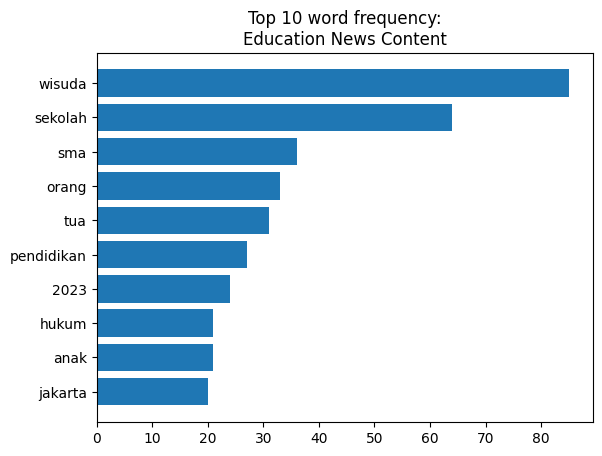

In [17]:
import matplotlib.pyplot as plt

plt.barh(
    list(tokenized_words_count_sorted.keys())[-10:],
    list(tokenized_words_count_sorted.values())[-10:]
)
plt.title('Top 10 word frequency:\nEducation News Content')
plt.show()